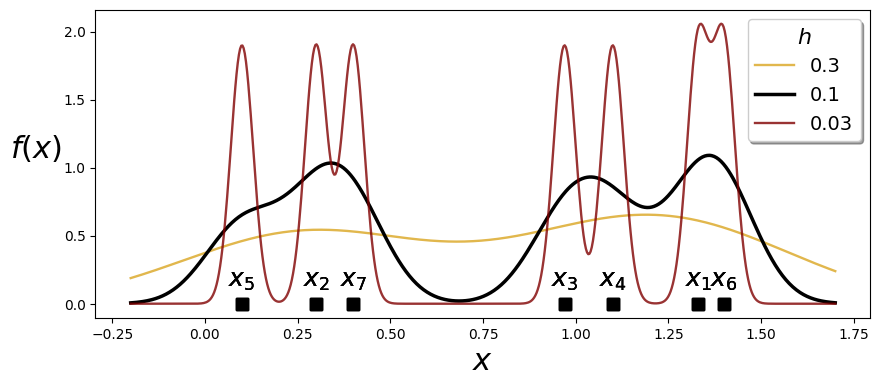

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

# the kernel function
def K(x):
    return np.exp(-x**2/2) / np.sqrt(2*np.pi)

# dummy dataset
dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# x-value range for plotting KDEs
x_range = np.linspace(dataset.min() - 0.3, dataset.max() + 0.3, num=600)

# bandwidth values for experimentation
H = [0.3, 0.1, 0.03]
n_samples = dataset.size

# line properties for different bandwidth values
color_list = ['goldenrod', 'black', 'maroon']
alpha_list = [0.8, 1, 0.8]
width_list = [1.7,2.5,1.7]

plt.figure(figsize=(10,4))
# iterate over bandwidth values
for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
    total_sum = 0
    # iterate over datapoints
    for i, xi in enumerate(dataset):
        total_sum += K((x_range - xi) / h)
        plt.annotate(
            r'$x_{}$'.format(i+1),
                     xy=[xi, 0.13],
                     horizontalalignment='center',
                     fontsize=18,
        )
    y_range = total_sum/(h*n_samples)
    plt.plot(x_range, y_range, 
             color=color, alpha=alpha, linewidth=width, 
             label=f'{h}')

    plt.plot(dataset, np.zeros_like(dataset) , 's', 
             markersize=8, color='black')
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=20)
plt.legend(fontsize=14, shadow=True, title='$h$', title_fontsize=16)
plt.show()

# KDE with Seaborn

C:\Users\shayn\PycharmProjects\DeepLearning_MLM\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shayn\PycharmProjects\DeepLearning_MLM\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


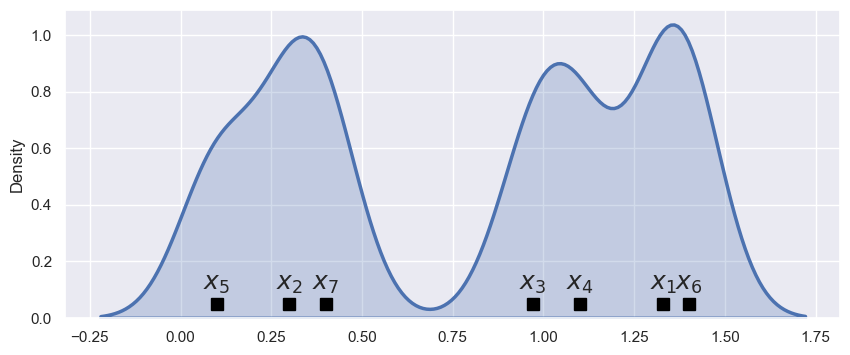

In [4]:
import seaborn as sns

sns.set()

# dummy dataset
dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

fig, ax = plt.subplots(figsize=(10, 4))

sns.kdeplot(ax=ax,
            data=dataset,
            bw_adjust=0.3,
            linewidth=2.5, 
            fill=True)

# plot datapoints
ax.plot(dataset, np.zeros_like(dataset) + 0.05, 's',
        markersize=8, color='black')

for i, xi in enumerate(dataset):
    plt.annotate(
        r'$x_{}$'.format(i+1),
        xy = [xi, 0.1],
        horizontalalignment = 'center',
        fontsize=18,
    )
plt.show()

# Scikit Learn Implication

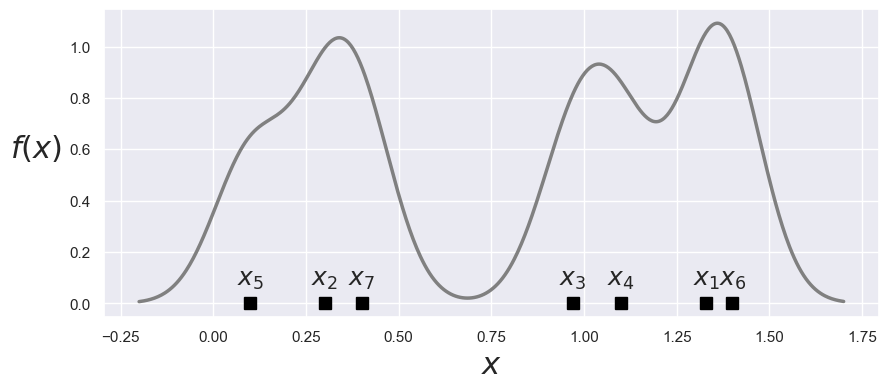

In [5]:
from sklearn.neighbors import KernelDensity

dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# KernelDensity requires 2D array
dataset = dataset[:, np.newaxis]

# fit KDE to the dataset
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(dataset)

# x-value range for plotting KDE
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)

# compute the log-likelihood of each sample
log_density = kde.score_samples(x_range[:, np.newaxis])

plt.figure(figsize=(10,4))
# put labels over datapoints
for i, xi in enumerate(dataset):
    plt.annotate(r'$x_{}$'.format(i+1),
                 xy=[xi, 0.07],
                 horizontalalignment='center',
                 fontsize=18)

# draw KDE curve
plt.plot(x_range, np.exp(log_density), 
         color='gray', linewidth=2.5)

# draw boxes representing datapoints
plt.plot(dataset, np.zeros_like(dataset) , 's', 
         markersize=8, color='black')
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()

**The Scikit learn solution has the advantage of being able to be used as a generative model to generate synthetic data samples.**

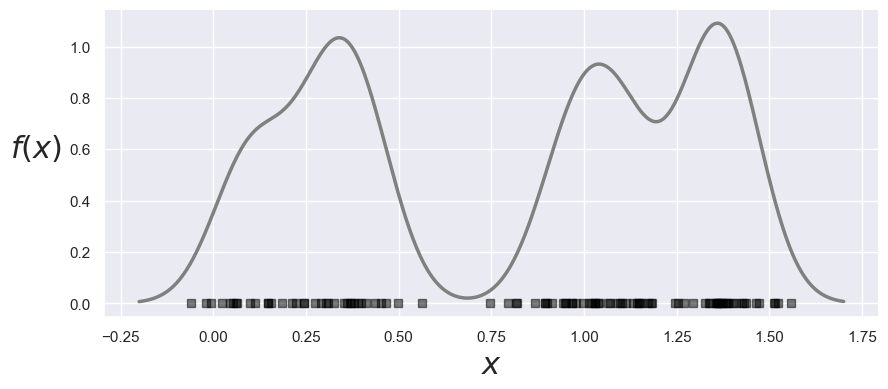

In [6]:
# Generate random samples from the model
synthetic_data = kde.sample(100)

plt.figure(figsize=(10,4))

# draw KDE curve
plt.plot(x_range, np.exp(log_density), 
         color='gray', linewidth=2.5)

# draw boxes representing datapoints
plt.plot(synthetic_data, np.zeros_like(synthetic_data) , 's', 
         markersize=6, color='black', alpha=0.5)
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()

The distinguishing features of KDE’s:

 - this is a function made up of a single type of building blocks termed kernel function;
 - this is a nonparametric estimator, which means that its functional form is determined by the datapoints;
 - the shape of the generated PDF is heavily influenced by the value of the kernel bandwidth h;
 - to fit to the dataset, no optimization technique is required.